In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import os

In [2]:
# Find the uppler and lower layer depth above the sill crest
def Zprof(file, xloc):
    state0 = xr.open_dataset(file)
    state = state0.isel(Y = range(1,10), T = range(60,121)) # Remove the boundary walls in y direction
    depth = state.Z.data
    pt = state.Temp.isel(X = xloc).data # dims = T, Z, Y
    s = state.S.isel(X = xloc).data
    u = state.U.data # dims = T, Z, Y, Xp1

    # Mean value in Y direction, boundaries removed
    pt_tmean = pt.mean(2).mean(0) # Time averaged profiles in z direction
    s_tmean = s.mean(2).mean(0)
    u_ymean = (u[:, :, :, 1:].mean(2) + u[:, :, :, :-1].mean(2)) / 2
    u_tmean = u_ymean[:, :, xloc].mean(0)
    mask = (pt_tmean == 0)
    pt_tmean[mask] = np.nan
    s_tmean[mask] = np.nan
    u_tmean[mask] = np.nan

    return (pt_tmean,s_tmean,u_tmean,depth)

In [42]:
file1 = '/Users/weiyangbao/Documents/Model_outputs/nodrag_010/state_007.nc'
file2 = '/Users/weiyangbao/Documents/Model_outputs/drag_010/state_007.nc'
xloc = 28
pt1, s1, u1, dep1 = Zprof(file1, xloc)
pt2, s2, u2, dep2 = Zprof(file2, xloc)

#pt1[:14].mean(), s1[14:20].mean() # Hs=15
#s1[:12].mean(), s1[12:17].mean() # Hs=12
s1[:11].mean(), s1[11:15].mean() # Hs=10

(16.944893, 21.885136)

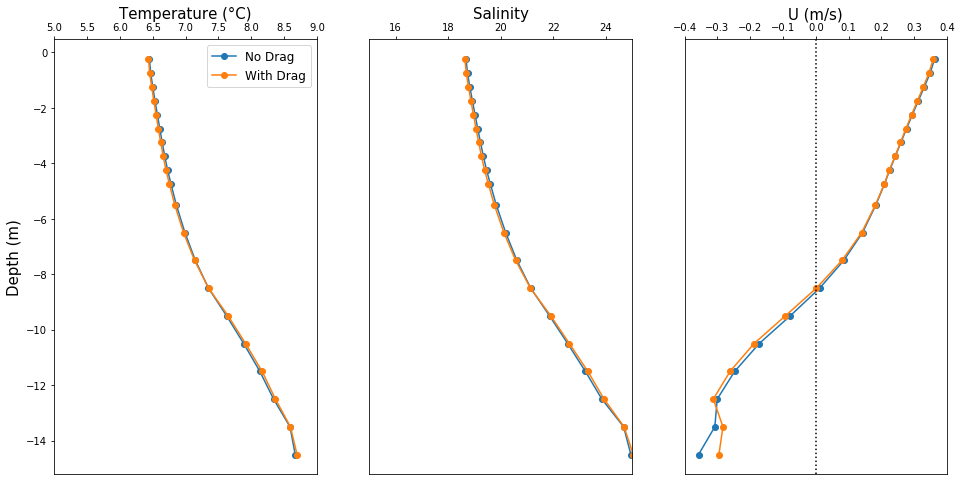

In [13]:
#fig_path = "/Users/weiyangbao/Documents/Jupyter_Figs/Drag012/TSUprof/"
fig_path = "/Users/weiyangbao/Documents/Model_outputs/TSUprof/"
#fig_path = "/home/1959/Jupyter_Figs/sill30/TSUprof/"
if not os.path.exists(fig_path):
    os.makedirs(fig_path)

# Three-panel plot
fig, (ax1, ax2, ax3) = plt.subplots(1,3,sharey=True, figsize=(16,8))
# Temperature
ax1.plot(pt1,dep1,'o-',label='No Drag')
ax1.plot(pt2,dep2,'o-',label='With Drag')
ax1.legend(loc='best', fontsize=12)
ax1.set_ylabel('Depth (m)',size = 15)
#ax1.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax1.set_xlabel('Temperature (\N{DEGREE SIGN}C)', size = 15)
ax1.set_xlim([5,9])
ax1.xaxis.set_label_position('top') # this moves the label to the top
ax1.xaxis.set_ticks_position('top') # this moves the ticks to the top
# Salinity
ax2.plot(s1,dep1,'o-')
ax2.plot(s2,dep2,'o-')
ax2.set_xlabel('Salinity', size = 15)
ax2.set_xlim([15,25])
ax2.xaxis.set_label_position('top') # this moves the label to the top
ax2.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax2.yaxis.set_visible(False) # This erases the y ticks
# Horizontal velocity
ax3.plot(u1,dep1,'o-')
ax3.plot(u2,dep2,'o-')
ax3.axvline(x=0,color='k',linestyle=':')
ax3.set_xlabel('U (m/s)', size = 15)
ax3.set_xlim([-0.4,0.4])
ax3.xaxis.set_label_position('top') # this moves the label to the top
ax3.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax3.yaxis.set_visible(False) # This erases the y ticks

fig.savefig(fig_path + '/sill15-700.png', dpi = 150, bbox_inches='tight')